### Data Load

1.[Loadig liberaries](#loading)

2.[Info & Basic samples](#sample)

3.[Renaming columns](#renaming)

4.[Data Conversions](#conversion)

5.[Processing Duplicatess](#duplicates)

6.[Processing Missing Values](#missing)

  [EDA](#eda)
  
1.[revenues by month & description](#1)

2.[revenues by months and aggregated quantity](#2)

<a id="loading"></a>

In [1]:
# ignore warnings
import sys
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import pandas as pd
from collections import Counter
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
from pandas_profiling import ProfileReport
import math
from functools import reduce
import random
import re 
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import sidetable
english_stemmer = SnowballStemmer('english') 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
try:
    ecommerce = pd.read_csv('/Users/ohayo/Desktop/Final Project/ecommerce_dataset_us.csv', sep='\t')
    print('Final Project - local')
except:
    ecommerce = p.read_csv('/datasets/ecommerce_dataset_us.csv')
    print('wrong path')
    print('Final Project')

Final Project - local


In [3]:
profile = ProfileReport(ecommerce, title='Ecommerce Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="infosamp"></a>

<a id="sample"></a>

### Data info & samples

In [4]:
ecommerce.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 157.9 MB


Description & CustomerID has missing values

The dataset contains the following fields:
- `InvoiceNo` — order identifier, datatype: object, categorical variable
- `StockCode` —  item identifier, datatype: object, categorical varibale
- `Description` — item name, datatype: object, categorical variable
- `Quantity` — quantity, datatype: int, quantitative variable
- `InvoiceDate` — order date, datatype: object, quantitative varible
- `UnitPrice` — the price per item, datatype: float, quantitative variable
- `CustomerID` — the customer id , datatype: float, categorical variable

In [5]:
display('Dataset info:')
display(ecommerce.head(5))
display()
display('Dataset tail:')
display(ecommerce.tail(5))
display()
display('Sample:')
display(ecommerce.sample(2))
display('Descibe:')
display(ecommerce.describe(include='all'))

'Dataset info:'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


'Dataset tail:'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/07/2019 12:50,4.95,12680.0


'Sample:'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
458560,575843,21243,PINK POLKADOT PLATE,1,11/09/2019 12:02,1.69,14446.0
199309,554094,22855,FINE WICKER HEART,12,05/20/2019 12:49,1.25,15716.0


'Descibe:'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000
unique,25900,4070,4223,NaN,23260,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/29/2019 14:41,NaN,NaN
freq,1114,2313,2369,NaN,1114,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000


#### Renaming columns

<a id="renaming"></a>

In [6]:
ecommerce.rename(columns={"InvoiceNo": "invoice_#",
                          "StockCode": "stock_code",
                          "Description": "description",
                          "Quantity": "quantity",
                          "InvoiceDate": "invoice_date",
                          "UnitPrice": "unit_price",
                          "CustomerID": "customer_id",},
    inplace=True,
)

In [7]:
ecommerce['revenue'] = ecommerce['quantity'] * ecommerce['unit_price'] # adding revenue column

### Data Conversions

<a id="conversion"></a>

In [8]:
# Converting invoice_date to datetime object

ecommerce['invoice_date'] = pd.to_datetime(ecommerce['invoice_date'], format = '%m/%d/%Y %H:%M')
ecommerce['month'] = pd.to_datetime(ecommerce['invoice_date']).dt.month # Adding month column
ecommerce['year'] = pd.to_datetime(ecommerce['invoice_date']).dt.year # Adding year column

# Adding the day of the week where Monday=0, Sunday=6.

ecommerce['purchase_day'] = ecommerce['invoice_date'].dt.dayofweek

# adding 'time' column

ecommerce['time'] = ecommerce['invoice_date'].dt.time

print(ecommerce.head(3))

  invoice_# stock_code                         description  quantity  \
0    536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365      71053                 WHITE METAL LANTERN         6   
2    536365     84406B      CREAM CUPID HEARTS COAT HANGER         8   

         invoice_date  unit_price  customer_id  revenue  month  year  \
0 2018-11-29 08:26:00        2.55      17850.0    15.30     11  2018   
1 2018-11-29 08:26:00        3.39      17850.0    20.34     11  2018   
2 2018-11-29 08:26:00        2.75      17850.0    22.00     11  2018   

   purchase_day      time  
0             3  08:26:00  
1             3  08:26:00  
2             3  08:26:00  


In [9]:
ecommerce.sample()

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,month,year,purchase_day,time
66753,541816,22231,JIGSAW TREE WITH BIRDHOUSE,3,2019-01-19 15:56:00,1.45,17799.0,4.35,1,2019,5,15:56:00


### Processing duplicates

<a id="duplicates"></a>

In [10]:
ecommerce.purchase_day.dtypes

dtype('int64')

In [11]:
ecommerce['description'] = ecommerce['description'].str.lower()
ecommerce.sample(5)

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,month,year,purchase_day,time
160119,550448,22939,apron apple delight,2,2019-04-16 12:42:00,4.95,16746.0,9.90,4,2019,1,12:42:00
457726,575742,22972,children's spaceboy mug,12,2019-11-09 09:46:00,1.65,14309.0,19.80,11,2019,5,09:46:00
309610,564135,22626,black kitchen scales,1,2019-08-21 11:12:00,8.50,16550.0,8.50,8,2019,2,11:12:00
246074,558680,20711,jumbo bag toys,1,2019-06-29 11:19:00,4.13,NaN,4.13,6,2019,5,11:19:00
94093,544323,85114B,ivory enchanted forest placemat,4,2019-02-15 15:51:00,3.29,NaN,13.16,2,2019,4,15:51:00


In [12]:
ecommerce.description.value_counts()

white hanging heart t-light holder     2369
regency cakestand 3 tier               2200
jumbo bag red retrospot                2159
party bunting                          1727
lunch bag red retrospot                1638
                                       ... 
historic computer difference?....se       1
ruby glass necklace 42"                   1
wrong barcode                             1
barcode problem                           1
blue gingham rose cushion cover           1
Name: description, Length: 4206, dtype: int64

In [13]:
print("There is {:.2%} of duplicated rows".format(ecommerce.duplicated().sum() / len(ecommerce)))

There is 0.97% of duplicated rows


In [14]:
ecommerce.loc[ecommerce.duplicated(keep = False), :].head()

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,month,year,purchase_day,time
485,536409,22111,scottie dog hot water bottle,1,2018-11-29 11:45:00,4.95,17908.0,4.95,11,2018,3,11:45:00
489,536409,22866,hand warmer scotty dog design,1,2018-11-29 11:45:00,2.10,17908.0,2.10,11,2018,3,11:45:00
494,536409,21866,union jack flag luggage tag,1,2018-11-29 11:45:00,1.25,17908.0,1.25,11,2018,3,11:45:00
517,536409,21866,union jack flag luggage tag,1,2018-11-29 11:45:00,1.25,17908.0,1.25,11,2018,3,11:45:00
521,536409,22900,set 2 tea towels i love london,1,2018-11-29 11:45:00,2.95,17908.0,2.95,11,2018,3,11:45:00


In [15]:
ecommerce.drop_duplicates(keep = 'first', inplace = True) # 5,268 duplicates rows have been removed
display(ecommerce.duplicated().sum())

0

### Processing missing values

<a id="missing"></a>

In [16]:
ecommerce = ecommerce.drop('customer_id',axis=1) # dropping 'customerid' column

In [17]:
ecommerce.description.isnull().sum()

1454

In [18]:
# filling missing values in description column , based on matching stockcode
ecommerce['description'] = ecommerce['description'].fillna(ecommerce.groupby('stock_code')['description'].transform('first'))

In [19]:
print("Total missing values left in description column:", ecommerce.description.isnull().sum())
print("Description missing values in %:", ecommerce["description"].isnull().sum() / len(ecommerce)) 

# the presence of missing values in disription is quit negligible now

Total missing values left in description column: 112
Description missing values in %: 0.00020870563374770097


In [20]:
ecommerce[ecommerce['description'].isnull()]

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,revenue,month,year,purchase_day,time
1970,536545,21134,None,1,2018-11-29 14:32:00,0.0,0.0,11,2018,3,14:32:00
1987,536549,85226A,None,1,2018-11-29 14:34:00,0.0,0.0,11,2018,3,14:34:00
1988,536550,85044,None,1,2018-11-29 14:34:00,0.0,0.0,11,2018,3,14:34:00
2024,536552,20950,None,1,2018-11-29 14:34:00,0.0,0.0,11,2018,3,14:34:00
2026,536554,84670,None,23,2018-11-29 14:35:00,0.0,0.0,11,2018,3,14:35:00
...,...,...,...,...,...,...,...,...,...,...,...
280754,561498,21610,None,-14,2019-07-25 14:10:00,0.0,-0.0,7,2019,3,14:10:00
281615,561555,37477B,None,-11,2019-07-26 10:21:00,0.0,-0.0,7,2019,4,10:21:00
281616,561557,37477C,None,-31,2019-07-26 10:21:00,0.0,-0.0,7,2019,4,10:21:00
346849,567207,35592T,None,4,2019-09-17 11:01:00,0.0,0.0,9,2019,1,11:01:00


In [21]:
# Since the pattern of the missing values is negligible, and in addition, no recoverable stockcodes were found, 
## I decided to remove the missing values in the Description column.

ecommerce.dropna(subset = ['description'], inplace = True)

In [22]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536529 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_#     536529 non-null  object        
 1   stock_code    536529 non-null  object        
 2   description   536529 non-null  object        
 3   quantity      536529 non-null  int64         
 4   invoice_date  536529 non-null  datetime64[ns]
 5   unit_price    536529 non-null  float64       
 6   revenue       536529 non-null  float64       
 7   month         536529 non-null  int64         
 8   year          536529 non-null  int64         
 9   purchase_day  536529 non-null  int64         
 10  time          536529 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 49.1+ MB


<a id="eda"></a>

### EDA

In [65]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    ecommerce[parameter].hist()
    plt.show()
    if ecommerce[parameter].mean()>ecommerce[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('-' * 10)
    print('Statistics on: {}'.format(parameter))
    print(ecommerce[parameter].describe())
    ninety_nine = np.percentile(ecommerce[parameter], 99)
    two = np.percentile(ecommerce[parameter], 2)
    print('-' * 10)
    print('min border:',two)
    print('max border',ninety_nine)
    print('-' * 10)
    print('The outliers are considerd to be values below',two, "and above",ninety_nine)
    print('We have',len(ecommerce[(ecommerce[parameter]<two)|(ecommerce[parameter]>ninety_nine)]), "values that we can consider outliers")

The histogram of: unit_price


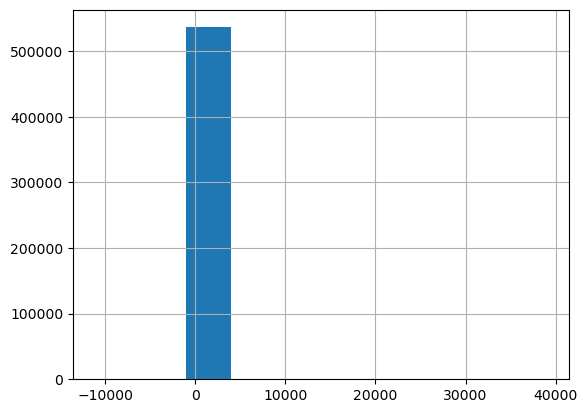

The distribution is skewed to the right
----------
Statistics on: unit_price
count    536529.000000
mean          4.633623
std          97.243243
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64
----------
min border: 0.29
max border 18.0
----------
The outliers are considerd to be values below 0.29 and above 18.0
We have 11443 values that we can consider outliers
The histogram of: quantity


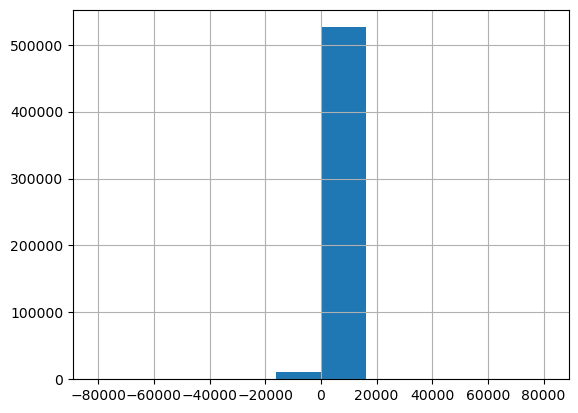

The distribution is skewed to the right
----------
Statistics on: quantity
count    536529.000000
mean          9.623748
std         219.152755
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
----------
min border: 1.0
max border 100.0
----------
The outliers are considerd to be values below 1.0 and above 100.0
We have 15438 values that we can consider outliers
The histogram of: revenue


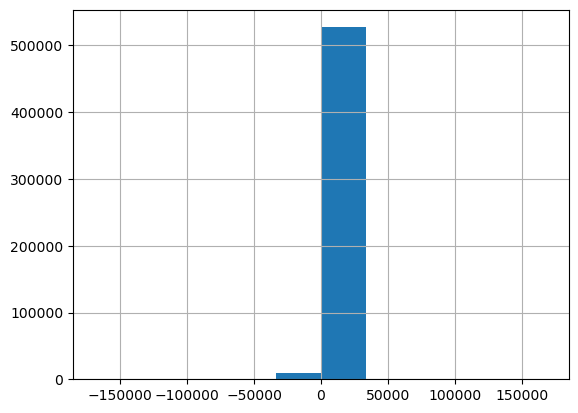

The distribution is skewed to the right
----------
Statistics on: revenue
count    536529.000000
mean         18.127644
std         380.695902
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: revenue, dtype: float64
----------
min border: 0.0
max border 180.80239999998827
----------
The outliers are considerd to be values below 0.0 and above 180.80239999998827
We have 14619 values that we can consider outliers


In [66]:
for parameter in ['unit_price', 'quantity', 'revenue']:
    distribution_percentile(parameter)

In [67]:
border_list = []
for parameter in ['unit_price', 'quantity', 'revenue']:
    ninety_nine = np.percentile(ecommerce[parameter], 99)
    two = np.percentile(ecommerce[parameter], 2)
    border_list.append([parameter,two,ninety_nine])

In [68]:
border_list

[['unit_price', 0.29, 18.0],
 ['quantity', 1.0, 100.0],
 ['revenue', 0.0, 180.80239999998827]]

--------------------
Unfiltered Quantity metrics: count    536529.000000
mean          9.623748
std         219.152755
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
97% of the customers purchases falls within the amount which is less\equal to: 667.082013
Skeweness:
True
The Quantity distribution is positively skewed
Variacne: 48027.84029207601
--------------------
Filtered metrics:
Quantity Metrics - outliers excluded: count    521091.000000
mean          7.996905
std          12.619281
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         100.000000
Name: quantity, dtype: float64
Variacne: 159.24595897230301


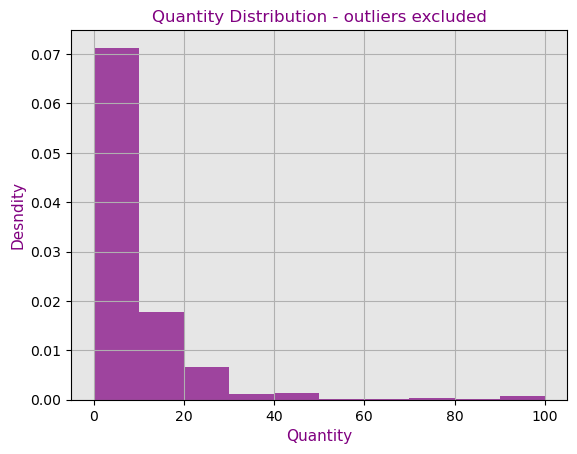

In [153]:
quantity_mask = (ecommerce['quantity']>=1)&(ecommerce['quantity']<=100)
masker = ecommerce[quantity_mask]

# Unfiltered:
print('-'*20)
print("Unfiltered Quantity metrics:",ecommerce.quantity.describe())
adv_quantity_unfiltered = 219.152755 * 3 + 9.623748
print("97% of the customers purchases falls within the amount which is less\equal to: {}".format(adv_quantity_unfiltered))
print("Skeweness:")
print(ecommerce.quantity.mean()>ecommerce.quantity.median())
print("The Quantity distribution is positively skewed")
variance = np.var(ecommerce.quantity)
print("Variacne:",variance)
print('-'*20)

# Filtered:
print("Filtered metrics:")
quantity = masker['quantity']
quantity.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], alpha=0.7, color='purple', density=True)
plt.title("Quantity Distribution - outliers excluded", color='purple')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.ylabel('Desndity', fontsize=11, color='purple')
plt.xlabel('Quantity', fontsize=11, color='purple');
print("Quantity Metrics - outliers excluded:",quantity.describe())
variance = np.var(masker.quantity)
print("Variacne:",variance)

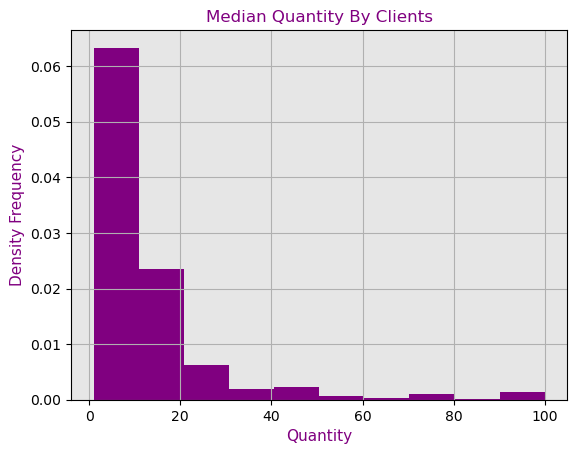

In [128]:
                                            # Quantity by Customers:
median_quantity = masker.pivot_table(
    index='invoice_#', values='quantity', aggfunc='median'
)
median_quantity.hist('quantity', color="purple", density=True)
plt.title("Median Quantity By Clients", color="purple")
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.ylabel('Density Frequency', fontsize=11, color='purple')
plt.xlabel('Quantity', fontsize=11, color='purple'); # more than 60% of our customers purchaseses 3 items at least (the median)
    

In [155]:
print(
    len(ecommerce[ecommerce['description'] == 'white hanging heart t-light holder'])
    / len(ecommerce['description'])
)

0.004393052379274932


In [168]:
x = int(input("Please enter an integer: "))

Please enter an integer: 42


In [154]:
ecommerce["description"].value_counts()

white hanging heart t-light holder    2357
regency cakestand 3 tier              2189
jumbo bag red retrospot               2156
party bunting                         1720
lunch bag red retrospot               1625
                                      ... 
s/4 black disco partition panel          1
mailout                                  1
mouldy                                   1
blue crystal boot phone charm            1
damages/samples                          1
Name: description, Length: 4206, dtype: int64

In [64]:
ecommerce.revenue.describe()

count    536529.000000
mean         18.127644
std         380.695902
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: revenue, dtype: float64

In [62]:
#monthy_quantitys=ecommerce.groupby(['invoice_#','month'])['quantity'].sum().reset_index()
#monthy_quantitys.sort_values(by='quantity')
mask = ecommerce['quantity'] < 0
discount_mask = ecommerce['description'] == 'discount' # 77
manual_mask = ecommerce['description'] == 'manual' # 567
manual_negatives = (ecommerce['description']=='manual')&(ecommerce['quantity']<0) # 244
manual_positives = (ecommerce['description']=='manual')&(ecommerce['quantity']>0) # 323
mailout = ecommerce['description'] == 'mailout' # 0 revnue , +300 quantity , 04-05-19
white_hanging_heart_t_light_holder = ecommerce['description'] == 'white hanging heart t-light holder'
invoice1 = ecommerce['invoice_#'] == '573585' # Our top customer
invoice2 = ecommerce['invoice_#'] == '581219'
dot = ecommerce['stock_code'] == 'DOT' # dotcom postage, 710 rows


masker = ecommerce[invoice2]
masker

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,revenue,month,year,purchase_day,time
536087,581219,22580,advent calendar gingham sack,8,2019-12-06 09:28:00,4.13,33.04,12,2019,4,09:28:00
536088,581219,22581,wood stocking christmas scandispot,10,2019-12-06 09:28:00,0.83,8.30,12,2019,4,09:28:00
536089,581219,22582,pack of 6 sweetie gift boxes,1,2019-12-06 09:28:00,4.96,4.96,12,2019,4,09:28:00
536090,581219,22586,feltcraft hairband pink and blue,1,2019-12-06 09:28:00,1.63,1.63,12,2019,4,09:28:00
536091,581219,22587,feltcraft hairband red and blue,1,2019-12-06 09:28:00,1.63,1.63,12,2019,4,09:28:00
...,...,...,...,...,...,...,...,...,...,...,...
536831,581219,90206A,gold diamante star brooch,1,2019-12-06 09:28:00,4.98,4.98,12,2019,4,09:28:00
536832,581219,90206C,crystal diamante star brooch,2,2019-12-06 09:28:00,4.98,9.96,12,2019,4,09:28:00
536833,581219,90208,pair of pink flower cluster slide,2,2019-12-06 09:28:00,2.48,4.96,12,2019,4,09:28:00
536834,581219,DOT,dotcom postage,1,2019-12-06 09:28:00,1008.96,1008.96,12,2019,4,09:28:00


In [60]:
ecommerce['invoice_#'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
547932        1
547933        1
547939        1
547943        1
C559003       1
Name: invoice_#, Length: 25788, dtype: int64

In [27]:
dotcom_postage_percentage = ecommerce["description"].value_counts(normalize=True).\
                            apply(lambda x: x * 100).loc["dotcom postage"]
value_percentage2 = ecommerce["description"].value_counts(normalize=True).apply(lambda x: x * 100).loc["dotcom postage"]
#value_percentage3 = ecommerce["description"].value_counts(normalize=True).apply(lambda x: x * 100).loc["dotcom postage"]
#value_percentage4 = ecommerce["description"].value_counts(normalize=True).apply(lambda x: x * 100).loc["dotcom postage"]

dotcom_postage_percentage

0.1323320827019602

### Exploration of Quantity

In [ ]:
display(ecommerce.quantity.hist(bins=30, color='green', figsize=(7,3)));

In [ ]:
ecommerce.quantity.mean(), ecommerce.quantity.median()

In [ ]:
display(ecommerce.quantity.plot(kind='box'));

In [ ]:
avg_quantity = ecommerce.quantity.mean()

ecommerce['quantity_class'] = (
    ecommerce['quantity'] > avg_quantity).astype(int)

In [ ]:
quantity_data = ecommerce['quantity_class'].value_counts(normalize=True)

quantity_data.plot(kind='bar', figsize=(7, 4), color='darkgreen', rot=0)

plt.title('High VS. Medium Quantity', color='green', size=13)
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.ylabel('Quantity Share', fontsize=11, color='darkgreen')
plt.xlabel('Quantity class', fontsize=11, color='darkgreen')


for i, (x, y) in enumerate(quantity_data.to_dict().items()):
    plt.text(i-.1, y, s=str(round(y, 2)), fontsize=9)
plt.xticks([0,1], ['Medium', 'High'])
plt.show();

In [ ]:
ecommerce[ecommerce.quantity == ecommerce.quantity.min()] # min quantity

In [ ]:
ecommerce[ecommerce.quantity == ecommerce.quantity.max()] # max quantity

### Exploration of Days

In [ ]:
days_dist=ecommerce.purchase_day.value_counts(normalize=True)

days_dist.plot(kind='bar', color='darkgreen', rot=0)

plt.title('The distribution of days', color='green', size=13)
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.ylabel('Relative Share', fontsize=11, color='darkgreen')
plt.xlabel('Days', fontsize=11, color='darkgreen')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Saturday', 'Monday'])
plt.legend()

for i, (x, y) in enumerate(days_dist.to_dict().items()):
    plt.text(i-.15, y, s=str(round(y, 2)), fontsize=9)
plt.show();

In [ ]:
def day_group(day):
    """
    The function returns day groups according to the day value, using the following rules:
    —'weekend' for Friday(=4) & Saturday(=5)
    —'weekdays' for Sunday(=6) to Thursday(=3)
    """
    
    if (3 < day < 6):
        return 'weekend'
    else:
        return 'weekday'

In [ ]:
ecommerce['day_group'] = ecommerce['purchase_day'].apply(day_group) # applying & creating 'day_group' column

ecommerce.head(2)

In [ ]:
days_dict={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday'
}

days_dict.get(2)

In [ ]:
ecommerce=ecommerce.replace({"purchase_day": days_dict})

In [ ]:
transactions=ecommerce.groupby(['purchase_day'])['unit_price'].\
                        agg(['count','mean']).reset_index()
transactions.sort_values(by='mean', ascending=False)

In [ ]:
mean_unit_price_days=sns.scatterplot(data=transactions, x='purchase_day', y='mean', hue='purchase_day', palette='pastel')

plt.xlabel('Day', fontsize=11, color='brown')
plt.ylabel('Mean Unit Price', fontsize=11, color='brown')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0.1)
plt.title('Mean unit price by week days', color='orange')
plt.show()

In [ ]:
day_group(3) # checking the function

### Exploration of Months

In [ ]:
ecommerce.month.value_counts(normalize=True).plot(kind='bar', color='green', rot=0)
plt.title('The distribution of Months', color='green')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.ylabel('Relative Share', fontsize=11, color='darkgreen')
plt.xlabel('Month', fontsize=11, color='darkgreen')
plt.legend();

In [ ]:
month_transactions=ecommerce.groupby(['month'])['unit_price'].\
                        agg(['count','mean']).reset_index()
month_transactions.sort_values(by='mean', ascending=False).head(5)

In [ ]:
sns.scatterplot(data=month_transactions, x='month', y='mean', hue='month', palette='pastel')
plt.xlabel('Month', fontsize=11, color='brown')
plt.ylabel('Mean Unit Price', fontsize=11, color='brown')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0.1)
plt.title('Mean unit price by months', color='orange')
plt.show()

#### Revenue

In [ ]:
ecommerce.revenue.hist(bins=5);

## ניסוי

In [ ]:
print(ecommerce.quantity.describe())
ecommerce.quantity.hist()
plt.savefig('quantity')

ecommerce['quantity'].mean()>ecommerce['quantity'].median() # Quantity is right/positively skewed
                                                            # 75% of quantity is below 10
                                                            # 25% of quantity is below 1
                                                            # 50% of quantity is above 3 and 50% is below 3

In [ ]:
np.percentile(ecommerce.quantity, 99)

In [ ]:
np.percentile(ecommerce.quantity, 2)

In [ ]:
Q1 = ecommerce['quantity'].quantile(0.25)
Q3 = ecommerce['quantity'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
min_iqr=Q1-1.5*IQR
max_iqr=Q3+1.5*IQR
print('min border:',min_iqr)
print('max border:',max_iqr)

In [38]:
border_data = pd.DataFrame(border_list,columns=['parameter','min_border','max_border'])
border_data

,parameter,min_border,max_border
0,unit_price,0.29,18.0000
1,quantity,1.00,100.0000
2,revenue,0.00,180.8024


In [118]:
def season(dt):
    if dt.month in [12, 1, 2]:
        return 'Winter'
    elif dt.month in [3, 4, 5]:
        return 'Spring'
    elif dt.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [121]:
ecommerce['season'] = ecommerce['invoice_date'].apply(season)

In [81]:
len(ecommerce)

536529

In [79]:
unitprice_filter = (ecommerce['unit_price']>0.29)&(ecommerce['unit_price']<18)
quantity_filter = (ecommerce['quantity']>1)&(ecommerce['quantity']<100)
revenue_filter = (ecommerce['revenue']>0)&(ecommerce['unit_price']<180.8024)

In [84]:
ecommerce[unitprice_filter ].head(2)

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,revenue,month,year,purchase_day,time
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,15.30,11,2018,Thursday,08:26:00
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,20.34,11,2018,Thursday,08:26:00


In [31]:
ecommerce.description.unique()

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'lost',
       'cream hanging heart t-light holder',
       'paper craft , little birdie'], dtype=object)

<AxesSubplot: xlabel='invoice_date'>

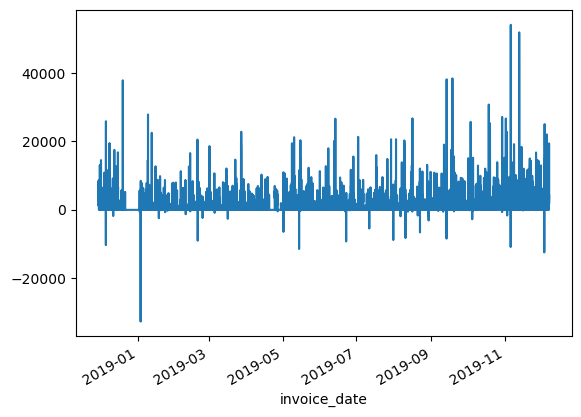

In [32]:
hourly=ecommerce.resample('H', on='invoice_date').revenue.sum() # Revenue by hourly raounded intervals
hourly.to_frame(name='hourly')
hourly=hourly.sort_values(axis=0, ascending=False)

hourly.plot(x='invoice_date', y='revenue')

In [33]:
first_quarter=ecommerce.resample('H', on='invoice_date', offset='15Min00s').revenue.sum() # Revenue by intervals hours that starts at xx:15

In [34]:
half=ecommerce.resample('H', on='invoice_date', offset='30Min00s').revenue.sum() # Revenue by intervals of xx:30

In [35]:
third_quarter=ecommerce.resample('H', on='invoice_date', offset='45Min00s').revenue.sum()
third_quarter

invoice_date
2018-11-29 07:45:00      527.95
2018-11-29 08:45:00     3205.44
2018-11-29 09:45:00     8439.59
2018-11-29 10:45:00     4489.38
2018-11-29 11:45:00     7792.11
                         ...   
2019-12-07 08:45:00     5923.97
2019-12-07 09:45:00    19271.75
2019-12-07 10:45:00     1482.12
2019-12-07 11:45:00     4565.18
2019-12-07 12:45:00      588.65
Freq: H, Name: revenue, Length: 8958, dtype: float64

In [36]:
# data re-sampled based on an each week
# week start: Monday
revenue_by_weeks=ecommerce.resample('W-MON', on='invoice_date').revenue.sum()
revenue_by_weeks.head(5)

invoice_date
2018-12-03    181088.89
2018-12-10    269518.44
2018-12-17    206397.01
2018-12-24     89719.27
2018-12-31         0.00
Freq: W-MON, Name: revenue, dtype: float64

In [37]:
# data re-sampled based on each month
ecommerce.resample('MS', on='invoice_date').revenue.sum()

invoice_date
2018-11-01     104539.880
2018-12-01     642183.730
2019-01-01     607854.450
2019-02-01     491357.550
2019-03-01     662566.860
2019-04-01     475027.041
2019-05-01     767802.050
2019-06-01     650449.140
2019-07-01     703302.801
2019-08-01     724046.080
2019-09-01     950182.892
2019-10-01    1131566.720
2019-11-01    1490607.500
2019-12-01     324520.260
Freq: MS, Name: revenue, dtype: float64

In [38]:
# aggregating multiple fields for each hour
by_revenue=ecommerce.resample('H', on='invoice_date').agg({'revenue':'sum', 'quantity':'sum','stock_code':'nunique'})\
.sort_values(by='revenue', ascending=False).head(5)
by_revenue.rename(columns={"revenue": "Revenue", "quantity": "Quantity_Sold", "stock_code": 'Unique_Products'})

,Revenue,Quantity_Sold,Unique_Products
invoice_date,,,
2019-11-05 17:00:00,54089.63,15090,153
2019-11-12 17:00:00,51884.23,14547,198
2019-09-18 10:00:00,38431.25,14302,180
2019-09-13 15:00:00,38162.96,9987,166
2018-12-19 15:00:00,37870.98,10933,503


<a id="1"></a>

In [40]:
# Grouping by month & description , calculating revenue sum base on month intervals
# for each group we select the revenue, calculating the sum, and select the top 15 rows

by_revenue_description=ecommerce.groupby([pd.Grouper(key='invoice_date', freq='MS'), 'description']).revenue.sum()
by_revenue_description.sort_values(axis=0, ascending=False).head(15)

invoice_date  description                       
2019-06-01    picnic basket wicker 60 pieces        39619.50
2019-11-01    dotcom postage                        38360.88
              rabbit night light                    34499.58
              paper chain kit 50's christmas        29457.98
2018-12-01    dotcom postage                        23493.93
              regency cakestand 3 tier              23229.32
2019-05-01    party bunting                         19744.01
2019-10-01    dotcom postage                        18704.80
2019-12-01    dotcom postage                        17667.54
2019-01-01    white hanging heart t-light holder    16338.11
2019-07-01    party bunting                         15483.11
2019-01-01    dotcom postage                        15052.22
2019-11-01    popcorn holder                        14914.23
2019-03-01    regency cakestand 3 tier              14605.29
2019-11-01    white hanging heart t-light holder    14441.57
Name: revenue, dtype: float64

<a id="2"></a>

In [41]:
# revenues by months and aggregated quantity

revenue_by_transactions_months=ecommerce.groupby([pd.Grouper(key='invoice_date', freq='MS'), 'quantity'])\
                                .revenue.sum()
revenue_by_transactions_months.sort_values(axis=0, ascending=False)

invoice_date  quantity
2019-12-01     80995      168469.60
2019-11-01     12         162448.32
2019-10-01     12         149320.44
2019-11-01     1          143581.20
2019-09-01     12         124417.20
                            ...    
2019-01-01    -1          -41415.91
2018-12-01    -1          -58787.36
2019-06-01    -1          -58904.96
2019-01-01    -74215      -77183.60
2019-12-01    -80995     -168469.60
Name: revenue, Length: 2934, dtype: float64

In [42]:
# grouping data and named aggregation on stock_code_code, quantity, and revenue

descriptions=ecommerce.groupby([pd.Grouper(key='invoice_date', freq='MS'), 'description']).agg(unique_items=('stock_code', 'nunique'),
         total_quantity=('quantity','sum'),
         total_revenue=('revenue','sum'))

descriptions.info()
descriptions.sort_values([('total_revenue')], ascending=False)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 35958 entries, (Timestamp('2018-11-01 00:00:00', freq='MS'), ' 4 purple flock dinner candles') to (Timestamp('2019-12-01 00:00:00', freq='MS'), 'zinc wire sweetheart letter tray')
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_items    35958 non-null  int64  
 1   total_quantity  35958 non-null  int64  
 2   total_revenue   35958 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 981.2+ KB


unique_items  total_quantity  \
invoice_date description                                                     
2019-06-01   picnic basket wicker 60 pieces              1              61   
2019-11-01   dotcom postage                              1              49   
             rabbit night light                          1           14800   
             paper chain kit 50's christmas              1            8066   
2018-12-01   dotcom postage                              1              52   
...                                                    ...             ...   
2019-07-01   amazon fee                                  1              -4   
2019-12-01   amazon fee                                  1              -2   
2019-01-01   amazon fee                                  1              -2   
2018-12-01   amazon fee                                  1              -5   
2019-06-01   manual                                      1              20   

                                              total_revenue  
invoice_date description                                     
2019-06-01   picnic basket wicker 60 pieces        39619.50  
2019-11-01   dotcom postage                        38360.88  
             rabbit night light                    34499.58  
             paper chain kit 50's christmas        29457.98  
2018-12-01   dotcom postage                        23493.93  
...                                                     ...  
2019-07-01   amazon fee                           -22178.10  
2019-12-01   amazon fee                           -29422.96  
2019-01-01   amazon fee                           -33341.73  
2018-12-01   amazon fee                           -39243.08  
2019-06-01   manual                               -39368.05  

[35958 rows x 3 columns]

## Revenues

#### Dicsounts:

In [43]:
discounts = ecommerce[ecommerce['stock_code']=='D']

print('-'*10)
print("Total sum of given discounts:",discounts.revenue.sum()) # sum of discounts
print('-'*10)
print("Discount daete 2018:", discounts.invoice_date.min())
print('-'*10)                                                # discounts where given at omce a year on 29/11
print("Discounts date 2019:", discounts.invoice_date.max())

----------
Total sum of given discounts: -5696.219999999999
----------
Discount daete 2018: 2018-11-29 09:41:00
----------
Discounts date 2019: 2019-11-29 08:49:00


#### Postage:

In [44]:
postage = ecommerce[ecommerce['stock_code']=='POST'] # 1256 Transactions were post.
postage.revenue.sum()   # total of 66,230.64 $ from postage costs

66230.64

#### Average Revenues By Months:

In [526]:
revenue_by_months=ecommerce.groupby('month')['revenue'].mean()
revenue_by_months.sort_values(axis=0, ascending=False).head(5) # average revnnues by months

month
9    20.002587
8    19.966525
5    19.505184
6    18.809981
3    18.725570
Name: revenue, dtype: float64

In [527]:
revenue_by_days=ecommerce.groupby('purchase_day')['revenue'].mean()
revenue_by_days.sort_values(axis=0, ascending=False) # Looks like Friday in the top

purchase_day
4    20.467068
2    19.453167
5    18.863946
3    18.465701
1    16.784700
0    12.716292
Name: revenue, dtype: float64

In [47]:
stock_code_grouped = ecommerce.groupby('stock_code').count()
stock_code_grouped.sort_values(by='invoice_#', ascending=False).reset_index().head(5) # grouped by description

,stock_code,invoice_#,description,quantity,invoice_date,unit_price,revenue,month,year,purchase_day,time
0,85123A,2301,2301,2301,2301,2301,2301,2301,2301,2301,2301
1,22423,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
2,85099B,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
3,47566,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720
4,20725,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626


In [525]:
ecommerce[10:12]

,invoice_#,stock_code,description,quantity,invoice_date,unit_price,revenue,month,year,purchase_day,time,quantity_class,day_group
10,536367,22745,poppy's playhouse bedroom,6,2018-11-29 08:34:00,2.1,12.6,11,2018,3,08:34:00,0,weekday
11,536367,22748,poppy's playhouse kitchen,6,2018-11-29 08:34:00,2.1,12.6,11,2018,3,08:34:00,0,weekday


#### Invoice_#

In [50]:
print(len(ecommerce['invoice_#'].unique()))  # we have 25,788 unique transactions

25788


In [51]:
invoice_ref = ecommerce[['invoice_#', 'stock_code', 'description']]
print('The size of the table with duplicates:')
print(len(invoice_ref)) # len of invoice_ref: 536,529

invoice_reference = invoice_ref.drop_duplicates().reset_index(drop=True)
print('The size of the table excluding duplicates:')
print(len(invoice_reference))
print('--' * 10)

The size of the table with duplicates:
536529
The size of the table excluding duplicates:
531115
--------------------


Revenue by each transaction:

In [52]:
revenue_log = ecommerce[['invoice_#','revenue']]
print(revenue_log.groupby('invoice_#').mean().sort_values('revenue',ascending=False).head(10)) 

                 revenue
invoice_#               
581483     168469.600000
541431      77183.600000
556444      38970.000000
537632      13541.330000
A563185     11062.060000
551697       8142.750000
540815       5053.633333
573003       4992.000000
550461       4307.180000
560373       4287.630000


#### Purchase day

#### Stock-Codes

In [ ]:
print(len(ecommerce['stock_code'].unique())) # 3598 unique stock-codes

#### Descriptions

In [ ]:
print(len(ecommerce['description'].unique())) # 4206 unique descriptions

In [ ]:
# count the number of descriptions for each stock code
cnt_description = (
    ecommerce.groupby("stock_code")["description"]
    .nunique()
    .reset_index()
    .sort_values(by="description", ascending=False)
)
cnt_description.loc[cnt_description["description"] > 1]

In [ ]:
ecommerce[7:] # indexing a list

In [ ]:
ecommerce.loc[:4]

In [ ]:
ecommerce.loc[ecommerce['unit_price']>100] # indexing by using loc

In [ ]:
summer = [month for month in ecommerce.month if month > 6] # list comprehension
    
# print(summer)

In [ ]:
def check_month(month): # filtered list by using filter function (we have to print as list since filter return an object)
    return month > 6

half = filter(check_month, ecommerce['month'])
#print(list(half))

In [ ]:
ecommerce[ecommerce.unit_price==ecommerce.unit_price.min()]

In [ ]:
ecommerce[ecommerce.stock_code=='B'] # B = debt ?

In [ ]:
ecommerce[ecommerce.unit_price==ecommerce.unit_price.max()]

In [ ]:
ecommerce[ecommerce.stock_code=='M'] 

In [ ]:
ecommerce[ecommerce.quantity==ecommerce.quantity.min()]

In [ ]:
ecommerce[ecommerce.quantity==ecommerce.quantity.max()]

In [ ]:
unique_codes = ecommerce.pivot_table(
    index='month', values='stock_code', aggfunc='nunique'
)
print(unique_codes.head(12))  # unique purchases by month

In [ ]:
data_pivot = ecommerce.pivot_table(
    index=['year'], values='stock_code', aggfunc='nunique') # unique products by year
data_pivot

In [ ]:
print(data_pivot.sort_values(by= 'stock_code', ascending=False).plot(kind='bar'))

In [ ]:
price_pivot = ecommerce.pivot_table(
    index=['month'], values='unit_price', aggfunc='mean').sort_values(by=
                                                                     'unit_price', ascending=False) # mean price by month
price_pivot

In [ ]:
price_pivot = ecommerce.pivot_table(
    index=['time'], values='invoice_#', aggfunc='count').sort_values(by=
                                                                     'time', ascending=False) # mean price by month
price_pivot

In [ ]:
price_pivot.hist('invoice_#', bins=100, range=(0, 1500))

In [ ]:
ecommerce.boxplot()

In [ ]:
price_Q1 = ecommerce['unit_price'].quantile(0.25)
price_Q3 = ecommerce['unit_price'].quantile(0.75)
IQR = price_Q3 - price_Q1
print("First quartile:", price_Q1)
print("Third quartile:", price_Q3) 
plt.ylim(-400,1000)
ecommerce.boxplot()
plt.hlines(y=[price_Q1-1.5*IQR], xmin= 0.9, xmax=1.1, color='red')

In [ ]:
print(ecommerce[ecommerce['invoice_#'] == 581587]) 

## Basket Analysis

In [ ]:
ecommerce['invoice_#'].nunique() # 25,788 unique transactions

In [ ]:
purchases = ecommerce.groupby(['invoice_#', 'stock_code'])['stock_code']\
                            .count().reset_index(name='count')

In [ ]:
ecommerce.stock_code.value_counts()

In [ ]:
purchases

In [ ]:
ecommerce[ecommerce.stock_code=='21730']['invoice_#'].nunique() # stock_code: 21730 appears in 139 transactions

In [ ]:
# support of stock code 47566

print(ecommerce[ecommerce.stock_code=='47566'].head(3))

# Calculating support for stock_code 85123A (#1 place on stock_Code value counts)
sub_47566 = purchases[purchases.stock_code=='47566']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()

display()

display('-' * 100)


print("The support for x  is:", sub_47566) # stock_code  will appear in 6% of our transactions

In [ ]:
# support of stock code 20725

print(ecommerce[ecommerce.stock_code=='20725'].head(3))

# Calculating support for stock_code 20725
sub_20725 = purchases[purchases.stock_code=='20725']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()

display()

display('-' * 100)


print("The support for x  is:", sub_20725)

In [ ]:
print(ecommerce[ecommerce.stock_code=='85123A'].head(3))

# Calculating support for stock_code 85123A (#1 place on stock_Code value counts)
sub_85123A = purchases[purchases.stock_code=='85123A']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()

display()

display('-' * 100)


print("The support for white/cream hanging heart t-light holder is:", sub_85123A) # stock_code 85123A will appear in only 8% 
                                                                                 # of our transactions

In [ ]:
print(ecommerce[ecommerce.stock_code=='22423'].head(3))

# Calculating support for stock_code 22423 (#2 place on stock_Code value counts)
sub_22423 = purchases[purchases.stock_code=='22423']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()
sub_22423 # stock_code 22423 will appear in only 8% of our transactions

display()

display('-' * 100)

print("The support for regency cakestand 3 tier is:", sub_22423)

In [ ]:
print(ecommerce[ecommerce.stock_code=='85099B'].head(3))

# Calculating support for stock_code 85099B (#3 place on stock_Code value counts)
sub_85099B = purchases[purchases.stock_code=='85099B']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()
sub_85099B # stock_code 85099B will appear in only 8% of our transactions

display()

display('-' * 100)

print("The support for jumbo bag red retrospot is:", sub_85099B)

Confidence

In [ ]:
cakestand_and_holder=purchases[purchases.stock_code.isin(['85123A', '22423'])].\
                    groupby(['invoice_#'])['stock_code'].count().reset_index().query('stock_code>1')

In [ ]:
display(cakestand_and_holder.head(4))
display(cakestand_and_holder['invoice_#'].nunique()) # 355 transactions where both  REGENCY CAKESTAND 3 TIER
                                                    # & WHITE/CREAM HANGING HEART T-LIGHT HOLDER appears.

In [ ]:
purchases[purchases['invoice_#']=='536502'] # double-check

In [ ]:
# calculating confidence for REGENCY CAKESTAND 3 TIER & WHITE/CREAM HANGING HEART T-LIGHT HOLDER

conf_cakestand = cakestand_and_holder['invoice_#'].nunique()\
                /purchases[purchases.stock_code=='22423']['invoice_#'].nunique()

print("Cakestand & T-light Holder confidence is:", conf_cakestand) # Out of all transactions where we had
                                                                   # REGENCY CAKESTAND 3 TEIR , 16% of them included
                                                                   # an additional purchase of WHITE/CREAM HANGING HEART 
                                                                   # T-LIGHT HOLDER.
conf_holder = cakestand_and_holder['invoice_#'].nunique()\
                /purchases[purchases.stock_code=='85123A']['invoice_#'].nunique()

print("WHITE/CREAM HANGING HEART T-LIGHT HOLDER & Cakestand confidence is:", conf_holder)  # 15.8% chance that if customer
                                                                                           # bought an HOLDER then he'll also
                                                                                           # buy CAKESTAND.
            
# meaning that there is 16% chance that if a customer bought REGENCY CAKESTAND 3 TEIR then he'll also by T-LIGHT HOLDER.

lift = con(x+y) / sup(x) = 

In [ ]:
# Lift for the pruchase of cakestand first , and a holder later = how buying holder would up-lift the purchase of cakestand.

print(conf_cakestand/sub_85123A) # 1.87 in Lift.
                                 ## meaning the combination of the pair is bennefical
    
# Lift of the purchase of a holder first , and a cakestand later = how buying a cakestand would up-lift purchase of holder.

print(conf_cakestand/sub_22423) # 1.94 in lift (even higher)

## A-priori analysis

In [ ]:
basket = (purchases
         .groupby(['invoice_#', 'stock_code'])['count']
         .sum().unstack().reset_index().fillna(0)
         .set_index('invoice_#'))

In [ ]:
basket.T[500:520]

In [ ]:
purchases[purchases.stock_code=='21314']

In [ ]:
def encoder(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = basket.applymap(encoder)

In [ ]:
basket_sets

In [ ]:
frequent_itemsets = apriori(basket_sets.astype('bool'), min_support=0.01, use_colnames=True)

frequent_itemsets.sort_values(by='support', ascending=False).head(10) # Top 10 supported combinations , order DESC by support

In [ ]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

In [ ]:
print(ecommerce[ecommerce.stock_code=='23170'].head(3))

# Calculating support for stock_code 23170 
sub_23170 = purchases[purchases.stock_code=='23170']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()
sub_23170 # stock_code 23170 will appear in only 1% of our transactions

display()

display('-' * 100)

print("The support for regency tea plate roses is:", sub_23170)

In [ ]:
print(ecommerce[ecommerce.stock_code=='23172'].head(3))

# Calculating support for stock_code 23172 
sub_23172 = purchases[purchases.stock_code=='23172']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()
sub_23172 # stock_code 23172 will appear in only X% of our transactions

display()

display('-' * 100)

print("The support for X is:", sub_23172)

In [ ]:
print(ecommerce[ecommerce.stock_code=='23171'].head(3))

# Calculating support for stock_code 23171 
sub_23171 = purchases[purchases.stock_code=='23171']['invoice_#'].nunique()\
/purchases['invoice_#'].nunique()
sub_23171 # stock_code 23171 will appear in only X% of our transactions

display()

display('-' * 100)

print("The support for X is:", sub_23171)

In [ ]:
pink_roses=purchases[purchases.stock_code.isin(['23170', '23172'])].\
                    groupby(['invoice_#'])['stock_code'].count().reset_index().query('stock_code>1')

In [ ]:
# calculating confidence for regency tea plate roses:

conf_roses = pink_roses['invoice_#'].nunique()\
                /purchases[purchases.stock_code=='23170']['invoice_#'].nunique()

print("regency tea plate roses & regency tea plate pink confidence is:", conf_roses)

conf_pink = pink_roses['invoice_#'].nunique()\
                /purchases[purchases.stock_code=='23172']['invoice_#'].nunique()

print("regency tea plate pink confidence & regency tea plate roses confidence is:", conf_pink)


**confidence between purchases of roses plate & pink plates:**

There is 60% chance that if a customer bought regency tea plate roses ,  then he'll buy an additional  regency tea plat pink. in other words , out of all putchases where roses plate were sold , in 60% of them the pink plate were sold too.

**Confidence between purchases of pink plates & roses plates:**

there is 86% chance that if a customer boght pink plate then they'll buy roses plates too. in other words , in the najority of cases were pink plates were sold , 86% included additional roses plates.

We have remarkable high confidence that these two products were sold together , in contrast to their induvidual support which is very low (1%).

Pink & Roses regency plates should be offer together. yet , it's best to sell them in addition to green plates ,  as the
combination of the three together bring confidence to the top 95%.

In [ ]:
ecommerce.head(5)